# <center><font color='#1a75ff'>An application for book lovers</font></center>

<center><img src="Books.jpg"></center>

## Contents  <a class="anchor" id="contents"></a>

* [Project description](#Project_description)
* [Project stages](#Project_stages)
    * [1. Data preprocessing](#Part_1)
        * [Conclusion](#part1Conclusion)
    * [2. Exploratory data analysis](#Part_2)
        * [Conclusion](#part2Conclusion)
* [General Conclusion](#General_Conclusion) 

## Project description <a class="anchor" id="Project_description"></a>

One of the startups is developing a new app for book lovers.
They provided a database with information that will be used to generate a value proposition for a new product. It contains data on books, publishers, authors, and customer ratings and reviews of books.

## Project stages <a class="anchor" id="Project_stages"></a>

## 1. Data preprocessing <a class="anchor" id="Part_1"></a>
The first step here is looking at the content of the database tables.

Import the libraries.

In [1]:
#import libraries
#packages for data manipulations
import pandas as pd
#an open-source SQL toolkit and object-relational mapper
from sqlalchemy import create_engine
#import packages for data plotting
import matplotlib.pyplot as plt
import seaborn as sns

The database contains 5 tables with data for analysis:

*books* - contains data on books<br>
*authors* - contains data on authors<br>
*publishers* - contains data on publishers<br>
*ratings* - contains data on user ratings<br>
*reviews* - contains data on customer reviews<br>

The tables are in a PostgreSQL database with the following structure:

<img src="db_schema.png" width="700" height="400">

Defining parameters for connecting to the database on PostgreSQL.

In [2]:
#parameters
db_config = {'user': 'praktikum_student',             #user name
             'pwd': 'Sdf4$2;d-d30pp',                 #password
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,                            #connection port
             'db': 'data-analyst-final-project-db'}   #name of the database
#database connection string
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                         db_config['pwd'],
                                                         db_config['host'],
                                                         db_config['port'],
                                                         db_config['db'])
#connecting to the database
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

Let's load the data and do an initial inspection.

In [3]:
#books table
pd.read_sql('SELECT * FROM books LIMIT 5', engine)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


Description of the data:
- book_id — a book identifier, primary key
- author_id — a author identifier, foreign key
- title — a title of book
- num_pages — number of pages
- publication_date — release date of the book
- publisher_id — a publisher identifier, foreign key

In [4]:
#authors table
pd.read_sql('SELECT * FROM authors LIMIT 5', engine)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


Description of the data:
- author_id — a author identifier, primary key
- author — a name of author

In [5]:
#publishers table
pd.read_sql('SELECT * FROM publishers LIMIT 5', engine)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


Description of the data:
- publisher_id — a publisher identifier, primary key
- publisher — a publisher name

In [6]:
#ratings table
pd.read_sql('SELECT * FROM ratings LIMIT 5', engine)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


Description of the data:
- rating_id — a rating identifier, primary key
- book_id — a book identifier, foreign key
- username — the name of the user who rated the book
- rating — a rating

In [7]:
#reviews table
pd.read_sql('SELECT * FROM reviews LIMIT 5', engine)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


Description of the data:
- review_id — a review identifier, primary key
- book_id — a book identifier, foreign key
- username — the name of the user who reviewed the book
- text — the text of the review

### Conclusion.<a class="anchor" id="part1Conclusion"></a>
[Go back to the Contents](#contents)

All data match the descriptions. 

## 2. Exploratory data analysis <a class="anchor" id="Part_2"></a>

In this part we will collect some statistics.

- **Find the number of books released after January 1, 2000.**

In [8]:
#sql query
query= '''SELECT COUNT(*) 
            FROM books 
           WHERE publication_date:: date > '2000-01-01' 
       '''
#sql query execution
df= pd.read_sql(query, engine)

In [9]:
print('The number of books released after January 1, 2000:')
print(df['count'][0])

The number of books released after January 1, 2000:
819


Since January 1, 2000, ratings and reviews of 819 books and brochures have been posted in the application.

- **Find the number of user reviews and the average rating for each book.**

In [10]:
#sql query
query= '''SELECT a.author, b.title, p.publisher
               , COUNT(rv.review_id) as count_reviews
               , AVG(rt.rating) as average_rating              
            FROM books b
           INNER JOIN authors a ON b.author_id = a.author_id 
           INNER JOIN publishers p ON p.publisher_id = b.publisher_id 
            LEFT JOIN reviews rv ON rv.book_id = b.book_id
            LEFT JOIN ratings rt ON rt.book_id = b.book_id
           WHERE b.publication_date:: date > '2000-01-01'
           GROUP BY a.author, b.title, p.publisher
           ORDER BY average_rating DESC
       '''
#sql query execution
df= pd.read_sql(query, engine)

In [11]:
#descriptive statistics
df.describe()

,count_reviews,average_rating
count,819.000000,819.000000
mean,26.902320,3.900203
std,70.340164,0.559967
min,0.000000,2.000000
25%,4.000000,3.500000
50%,9.000000,4.000000
75%,20.000000,4.333333
max,1120.000000,5.000000


As we can see, not all books are rated and not all of them have reviews.<br>
But basically, books receive from 4 to 20 reviews, on average, this is 9 reviews.<br>
The rating scale ranges from 2 to 5. The average rating is 4.

The *count_reviews* column contains an extra maximum value, let's take a closer look.

In [12]:
#dataset in detail view
df[df['count_reviews']>400].sort_values('count_reviews', ascending=False)\
                           .style.background_gradient(low=0, high=.9, cmap='GnBu'
                                                      , subset=['count_reviews','average_rating'])

,author,title,publisher,count_reviews,average_rating
562,Stephenie Meyer,Twilight (Twilight #1),Little Brown and Company,1120,3.662500
273,J.R.R. Tolkien,The Hobbit or There and Back Again,Houghton Mifflin,528,4.125000
487,J.D. Salinger,The Catcher in the Rye,Back Bay Books,516,3.825581
161,J.K. Rowling/Mary GrandPré,Harry Potter and the Prisoner of Azkaban (Harry Potter #3),Scholastic Inc.,492,4.414634
530,Dan Brown,Angels & Demons (Robert Langdon #1),Pocket Books,420,3.678571


Stephenie Meyer's book received a large number of reviews, but this did not affect the rating. It remained below average.<br>
Let's check the correlation between the values.

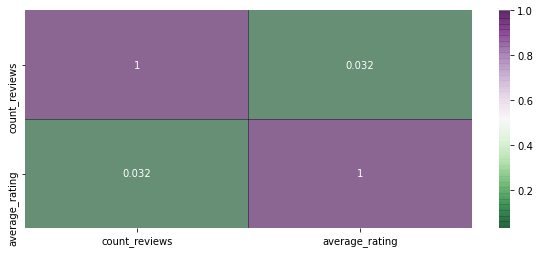

In [13]:
#remove outlier count_reviews=1120
corrMatrix = df[df['count_reviews']<1120].corr()
#heatmap chart
plt.figure(figsize=(10,4))
sns.heatmap(corrMatrix, cmap='PRGn_r', annot=True, alpha=.6);

We see low correlation of values.

- **Identify the publisher that has released the greatest number of books with more than 50 pages (this will help us exclude brochures and similar publications from your analysis)**

In [14]:
#sql query
query= '''SELECT p.publisher
               , COUNT(p.publisher) as number_of_books 
            FROM publishers p
           INNER JOIN books b ON p.publisher_id=b.publisher_id
           WHERE b.publication_date:: date > '2000-01-01'
             AND b.num_pages>50
           GROUP BY p.publisher
           ORDER BY number_of_books DESC
           LIMIT 5
       '''
#sql query execution
df= pd.read_sql(query, engine)

We have selected the 5 most popular publishers, let's see them on the graph.

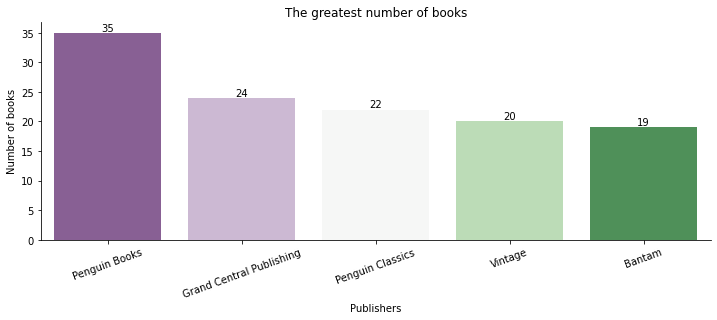

In [15]:
#plotting
fig, ax1 = plt.subplots(figsize=(12, 4))
ax = sns.barplot(x=df['publisher'], 
                 y=df['number_of_books'], 
                 palette="PRGn", ax=ax1);

#annotation of bar labels
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()), 
                    ha='center', va='bottom', color= 'black')
ax.set(title='The greatest number of books', ylabel='Number of books', xlabel='Publishers');
plt.xticks(rotation=20);
sns.despine(fig);

The Penguin Publishing Group committed to publishing great books and spreading the love of reading.

- **Identify the author with the highest average book rating: look only at books with at least 50 ratings.**

In [16]:
#sql query
query= '''SELECT a.author, b.title, p.publisher
               , COUNT(rv.review_id) as count_reviews
               , AVG(rt.rating) as average_rating              
            FROM books b
           INNER JOIN authors a ON b.author_id = a.author_id 
           INNER JOIN publishers p ON p.publisher_id = b.publisher_id 
            LEFT JOIN reviews rv ON rv.book_id = b.book_id
            LEFT JOIN ratings rt ON rt.book_id = b.book_id
           WHERE b.publication_date:: date > '2000-01-01'
             AND b.num_pages>50
           GROUP BY a.author, b.title, p.publisher
          HAVING COUNT(rv.review_id)>=50
           ORDER BY average_rating DESC
           LIMIT 10
       '''
#sql query execution
df= pd.read_sql(query, engine)

In [17]:
#dataframe visualization
df.style.bar(['count_reviews', 'average_rating'], color='#5fba7d')

,author,title,publisher,count_reviews,average_rating
0,Lisa See,Snow Flower and the Secret Fan,Random House,55,4.636364
1,Agatha Christie,And Then There Were None,St. Martin's Press,110,4.454545
2,J.K. Rowling/Mary GrandPré,Harry Potter and the Prisoner of Azkaban (Harry Potter #3),Scholastic Inc.,492,4.414634
3,J.R.R. Tolkien,The Fellowship of the Ring (The Lord of the Rings #1),Houghton Mifflin Harcourt,370,4.391892
4,George R.R. Martin,A Clash of Kings (A Song of Ice and Fire #2),Bantam,115,4.391304
5,Barbara Kingsolver,The Poisonwood Bible,Harper Perennial Modern Classics,110,4.363636
6,Rick Riordan,The Sea of Monsters (Percy Jackson and the Olympians #2),Hyperion Books,110,4.272727
7,Markus Zusak/Cao Xuân Việt Khương,The Book Thief,Alfred A. Knopf,318,4.264151
8,Alice Walker,The Color Purple,Pocket,64,4.250000
9,Betty Smith,A Tree Grows in Brooklyn,HarperCollins Publishers,60,4.250000


The highest rating is given to the author Lisa See with the book "Snow Flower and the Secret Fan".

- **Find the average number of text reviews among users who rated more than 50 books.**

In [18]:
#sql query
query= '''SELECT AVG(t.count_text_reviews) as average_number   
            FROM (
                  SELECT rt.username
                       , COUNT(rv.username) count_text_reviews
                    FROM books b
                    LEFT JOIN reviews rv ON rv.book_id = b.book_id
                    LEFT JOIN ratings rt ON rt.book_id = b.book_id
                   WHERE b.publication_date:: date > '2000-01-01'
                     AND b.num_pages>50
                   GROUP BY rt.username
                  HAVING COUNT(rt.username)>50
                  ) AS t
       '''
#sql query execution
df= pd.read_sql(query, engine)

In [19]:
print('The average number of text reviews:')
print('{:.0f}'.format(df['average_number'][0]))

The average number of text reviews:
137


### Conclusion.<a class="anchor" id="part2Conclusion"></a>
[Go back to the Contents](#contents)

In this analysis, we saw that since January 1, 2000, 819 books and brochures have been rated and reviewed.<br>
Readers write an average of 9 reviews and give on average fairly high ratings (4 on a five-point system).<br>
It should be noted that the rating and the availability of reviews are weakly related.<br>
The most frequently presented books are from The Penguin Publishing Group.

## General Conclusion. <a class="anchor" id="General_Conclusion"></a>
[Go back to the Contents](#contents)

Summing up, we can say that the main points for creating a new product of this type are the following:
- increasing the rating scale of books for more accurate recommendations
- incentive system for users writing reviews
- building a link between book rating and user reviews
- the introduction of additional elements of the classification of books (for example, the definition of brochures, magazines; definition of the genre)